In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
import seaborn as sns
from data_clean.newClean import get_data, get_corr_from_year

In [17]:
df_years, min_year, max_year = get_data()

corrlist = [get_corr_from_year(year, df_years, min_year) for year in range(min_year, max_year+1)]

/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [18]:
len(corrlist)

17

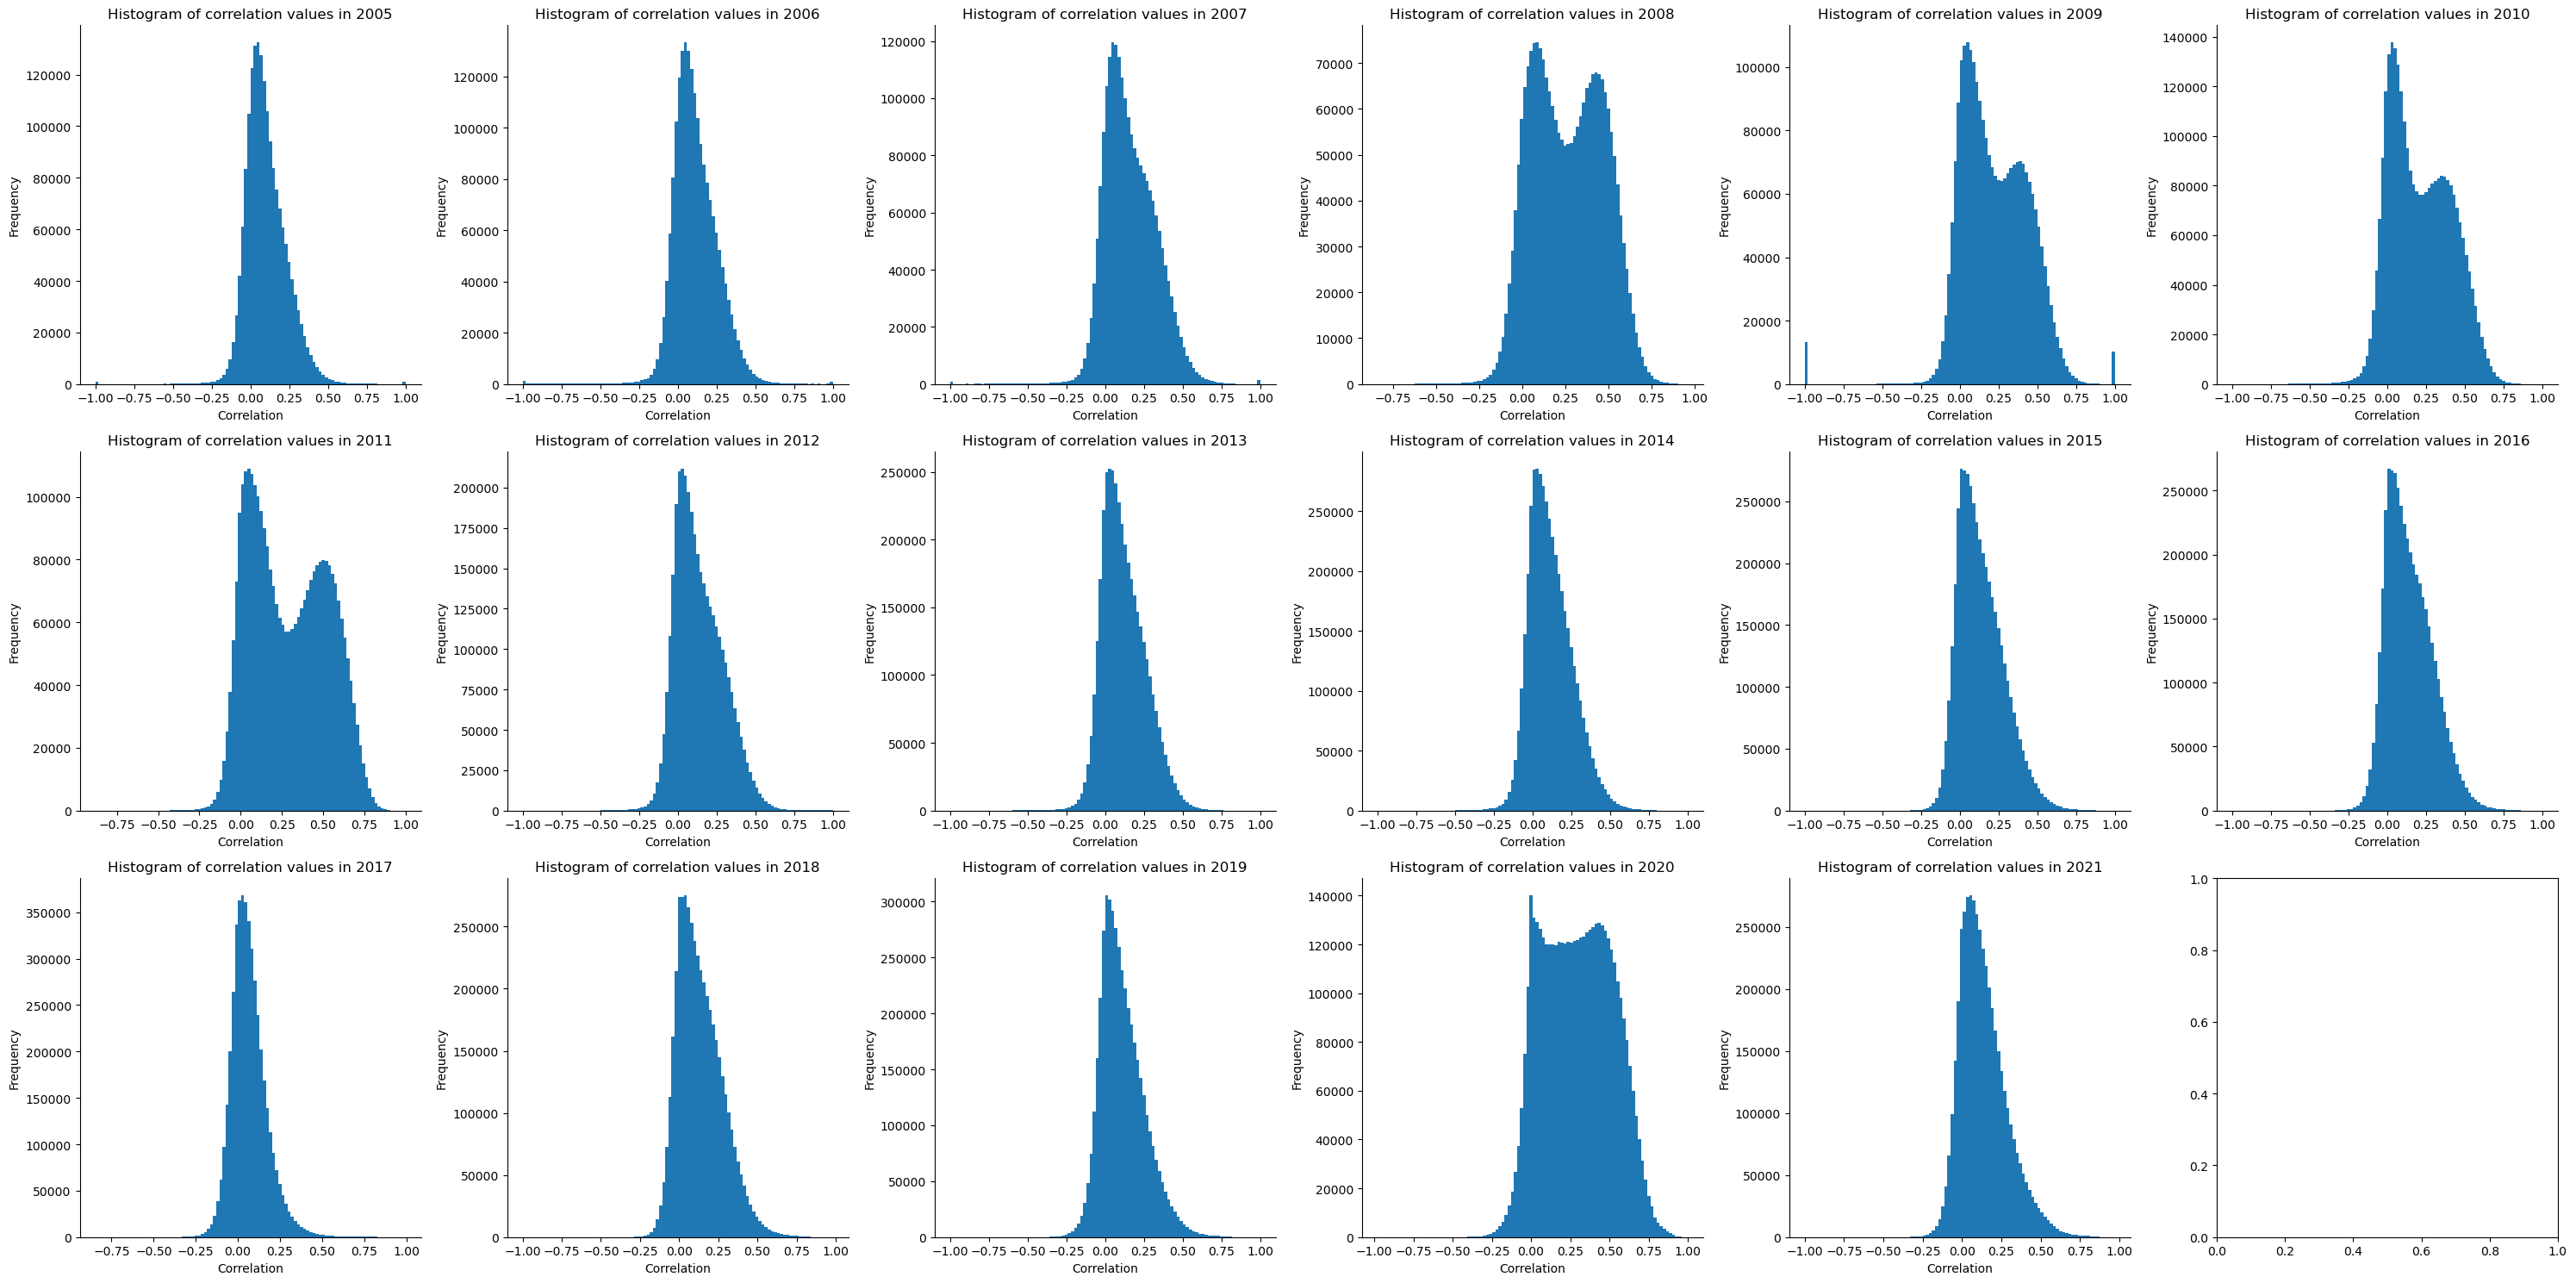

In [20]:
#histogram of correlation values
ncols, nrows, scale = 6,3,5
plt.figure(figsize = (ncols*scale, nrows*scale))
for i in range(nrows*ncols):
    try:
        plt.subplot(nrows, ncols, i+1)
        histcorr = corrlist[i]
        histcorr = np.triu(histcorr, k=1)
        histcorr = histcorr[histcorr != 0]
        #set line at 75 percentile and color the histogram after that line 
        plt.hist(histcorr, bins=100)
        plt.axvline(np.percentile(histcorr, 70), color='black', linewidth=1)
        #without borders
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

        plt.title(f'Histogram of correlation values in {min_year+i}')
        plt.xlabel('Correlation')
        plt.ylabel('Frequency')
    except:
        pass
plt.tight_layout()
plt.show()

In [20]:
histcorr.shape

(4616241,)

In [33]:
G = nx.from_numpy_matrix(corr)

In [34]:
np.fill_diagonal(corr, 0)
np.min(corr), np.max(corr), corr.shape

(-0.9512718283304298, 0.9989730293178903, (3039, 3039))

In [35]:
#print lowest 10 degrees
print(sorted(G.degree, key=lambda x: x[1])[:10])
print(G.number_of_edges()/3039*2)

[(0, 3040), (1, 3040), (2, 3040), (3, 3040), (4, 3040), (5, 3040), (6, 3040), (7, 3040), (8, 3040), (9, 3040)]
3040.0


In [36]:
from collections import Counter
#desciptive statistics of network
print(f'Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges')

abscorr = np.abs(corr)
avg_deg = dict(zip(df.columns, np.mean(abscorr, axis=1))) 
avg_deg = dict(sorted(avg_deg.items(), key=lambda item: item[1], reverse=True))
print(f'Average weighted degree: ', list(avg_deg.items())[:15])

Graph has 3039 nodes and 4619280 edges
Average weighted degree:  [('TOWN', 0.6976955215231209), ('CASY', 0.6964087601053219), ('LTBR', 0.6959815119217627), ('MKC', 0.6954339471852946), ('FFBC', 0.6939138318830335), ('GNOW', 0.6937378914340236), ('PNBK', 0.693483910825057), ('LXP', 0.6923717563190444), ('GBIM', 0.69217399189341), ('SAPIF', 0.6917949676530224), ('DHI', 0.6915151950896372), ('BWMG', 0.6914113599429796), ('DMO', 0.6913710271989887), ('VTN', 0.6904658297389636), ('ICL', 0.6899794829807876)]


(array([  1.,   0.,   0.,   3.,   0.,   0.,   2.,   3.,   3.,   2.,   2.,
          2.,   1.,   3.,   3.,   5.,   4.,   3.,   9.,   7.,  12.,  11.,
         13.,  17.,  16.,  19.,  16.,  13.,  26.,  30.,  27.,  17.,  19.,
         24.,  23.,  24.,  24.,  12.,  17.,  24.,  12.,  25.,  15.,  16.,
         14.,  11.,  23.,  22.,  19.,  22.,  15.,  20.,  21.,  19.,  20.,
         17.,  26.,  15.,  15.,  26.,  23.,  25.,  20.,  23.,  25.,  26.,
         28.,  24.,  22.,  22.,  31.,  34.,  29.,  25.,  34.,  30.,  35.,
         40.,  31.,  39.,  34.,  51.,  43.,  47.,  41.,  77.,  59.,  59.,
         59.,  87.,  82., 114., 118., 140., 138., 150., 142., 140.,  69.,
         13.]),
 array([0.02248699, 0.02923907, 0.03599116, 0.04274324, 0.04949533,
        0.05624741, 0.0629995 , 0.06975158, 0.07650367, 0.08325575,
        0.09000784, 0.09675992, 0.10351201, 0.1102641 , 0.11701618,
        0.12376827, 0.13052035, 0.13727244, 0.14402452, 0.15077661,
        0.15752869, 0.16428078, 0.17103286, 0.

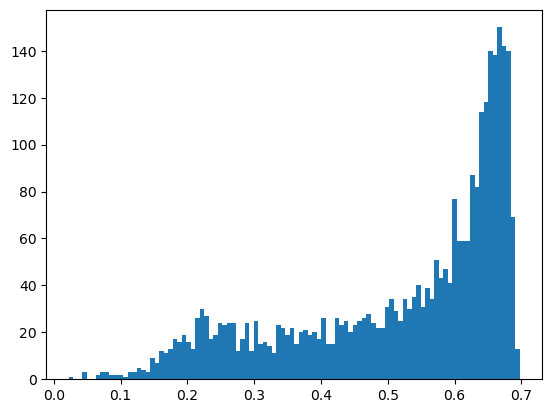

In [71]:
#histgram of average weighted degree
plt.hist(list(avg_deg.values()), bins=100)

In [39]:
pos = nx.spring_layout(G, weight='weight', seed=42, iterations=100)

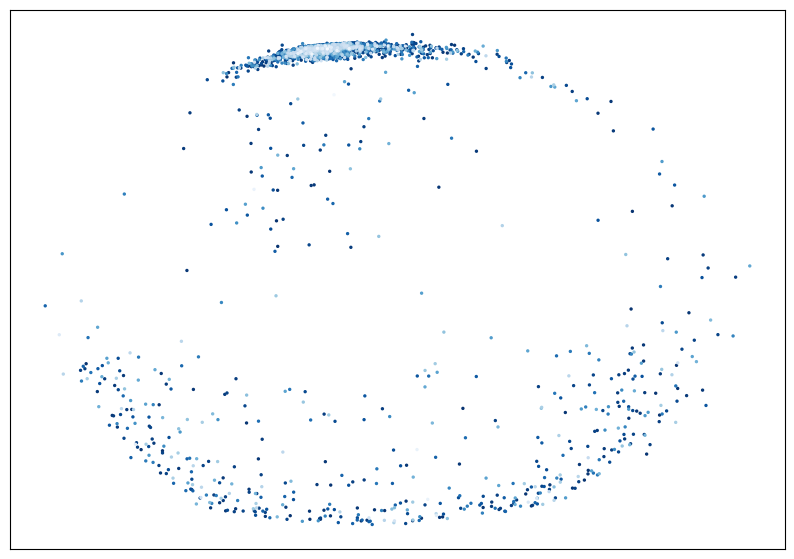

In [44]:
plt.figure(figsize=(10,7))
#color nodes by average weighted degree
nx.draw_networkx_nodes(G, node_size=2, alpha=1, pos=pos, node_color=list(avg_deg.values()), cmap=plt.cm.Blues)